# Practice problem for SVM

## Imports

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn import datasets

## Point Generation

In [9]:
np.random.seed(5)
spread = 2

### Circle 1

In [10]:
num_samples = 50
mean_center1 = [-1, -1]
covariance1 = [[spread, 0], [0, spread]]
circle_set_1 = np.random.multivariate_normal(mean_center1, covariance1, num_samples)

### Circle 2

In [11]:
mean_center_2 = [1, 1]
covariance2 = [[spread, 0], [0, spread]]
circle_set_2 = np.random.multivariate_normal(mean_center_2, covariance2, num_samples)

### Set X and Y

In [12]:
X = np.r_[circle_set_1, circle_set_2]
Y = [0] * num_samples + [1] * num_samples

## Plotting the Graph

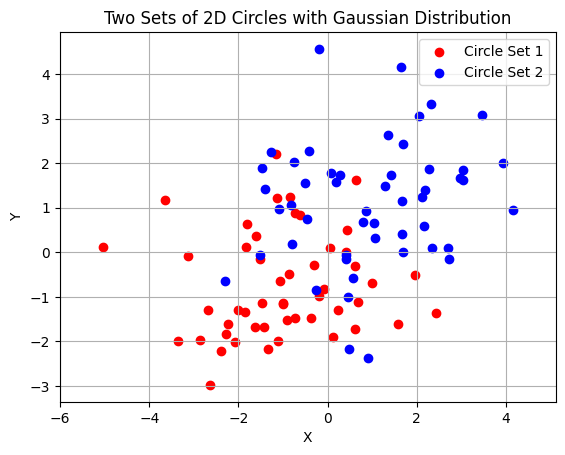

In [13]:
plt.scatter(circle_set_1[:, 0], circle_set_1[:, 1], label='Circle Set 1',  color='red')
plt.scatter(circle_set_2[:, 0], circle_set_2[:, 1], label='Circle Set 2', color='blue')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Two Sets of 2D Circles with Gaussian Distribution')
plt.legend()
plt.axis('equal')  # Equal aspect ratio for a better visualization
plt.grid(True)
plt.savefig("2d-before-svm.pdf", format="pdf", bbox_inches="tight")
plt.savefig("2d-before-svm.svg", format="svg", bbox_inches="tight")
plt.show()

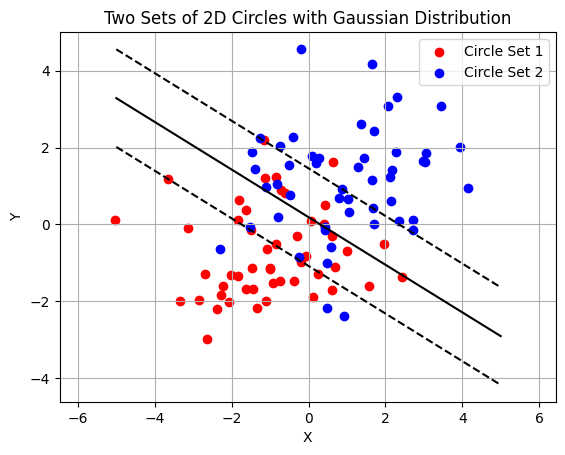

In [14]:
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X,Y)

# get the separating hyperplane
w = svm_classifier.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-5, 5)
yy = a * xx - (svm_classifier.intercept_[0]) / w[1]

margin = 1 / np.sqrt(np.sum(svm_classifier.coef_**2))
yy_down = yy - np.sqrt(1 + a**2) * margin
yy_up = yy + np.sqrt(1 + a**2) * margin

#Plot hyperplane
plt.plot(xx, yy, "k-")
plt.plot(xx, yy_down, "k--")
plt.plot(xx, yy_up, "k--")

# Plot the circles
plt.scatter(circle_set_1[:, 0], circle_set_1[:, 1], label='Circle Set 1',  color='red')
plt.scatter(circle_set_2[:, 0], circle_set_2[:, 1], label='Circle Set 2', color='blue')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Two Sets of 2D Circles with Gaussian Distribution')
plt.legend()
plt.axis('equal')  # Equal aspect ratio for a better visualization
plt.grid(True)
plt.savefig("2d-after-svm.pdf", format="pdf", bbox_inches="tight")
plt.savefig("2d-after-svm.svg", format="svg", bbox_inches="tight")
plt.show()